In [135]:
!pip install plotly==5.13.1

In [136]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns

In [137]:
mpl.style.use(['ggplot'])
plt.rcParams['axes.facecolor']='white'

# Se define función para establecer el formato de separador de miles
def thousand_separator(x, pos):
    return '{:,.0f}'.format(x)

In [138]:
df_2016 = pd.read_csv('/content/drive/MyDrive/2. TP Inteligencia Artificial/Conteo por dia de rayos /conteo_diario_2016.csv')
df_2017 = pd.read_csv('/content/drive/MyDrive/2. TP Inteligencia Artificial/Conteo por dia de rayos /conteo_diario_2017.csv')
df_2018 = pd.read_csv('/content/drive/MyDrive/2. TP Inteligencia Artificial/Conteo por dia de rayos /conteo_diario_2018.csv')

# Concatenar los DataFrames en uno solo
df = pd.concat([df_2016, df_2017, df_2018], ignore_index=True)

In [139]:
df.head(5)

,timestamp,count
0,2016-01-01,88501
1,2016-01-02,142019
2,2016-01-03,88345
3,2016-01-04,161770
4,2016-01-05,160750


In [140]:
df.tail(5)

,timestamp,count
793,2018-12-27,27687
794,2018-12-28,399473
795,2018-12-29,67649
796,2018-12-30,115542
797,2018-12-31,98187


In [141]:
df.describe()

,count
count,798.000000
mean,38958.793233
std,67277.839222
min,1.000000
25%,1221.750000
50%,10492.000000
75%,45027.750000
max,591549.000000


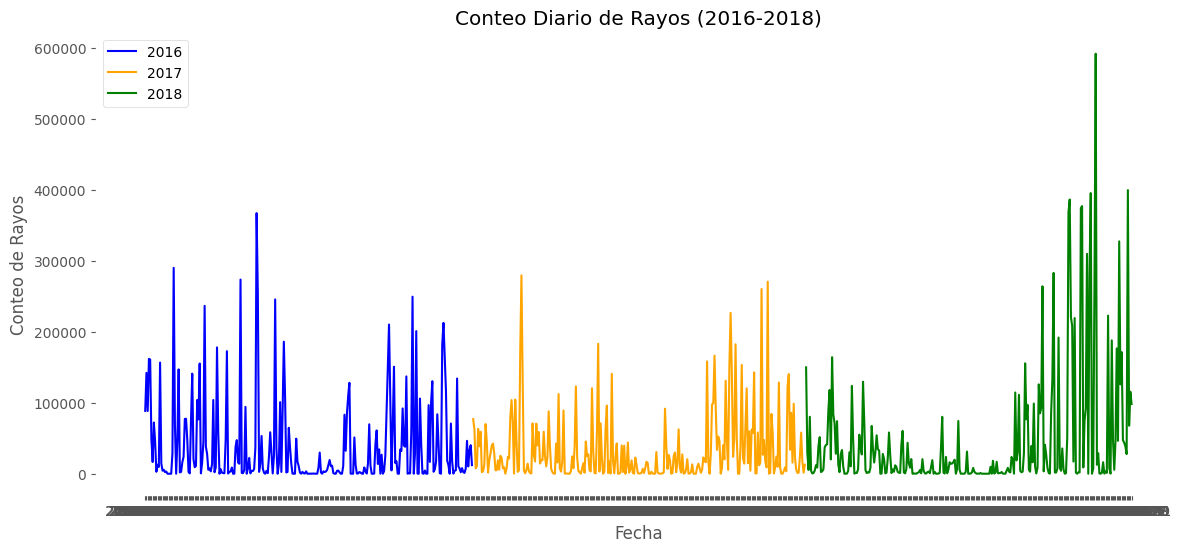

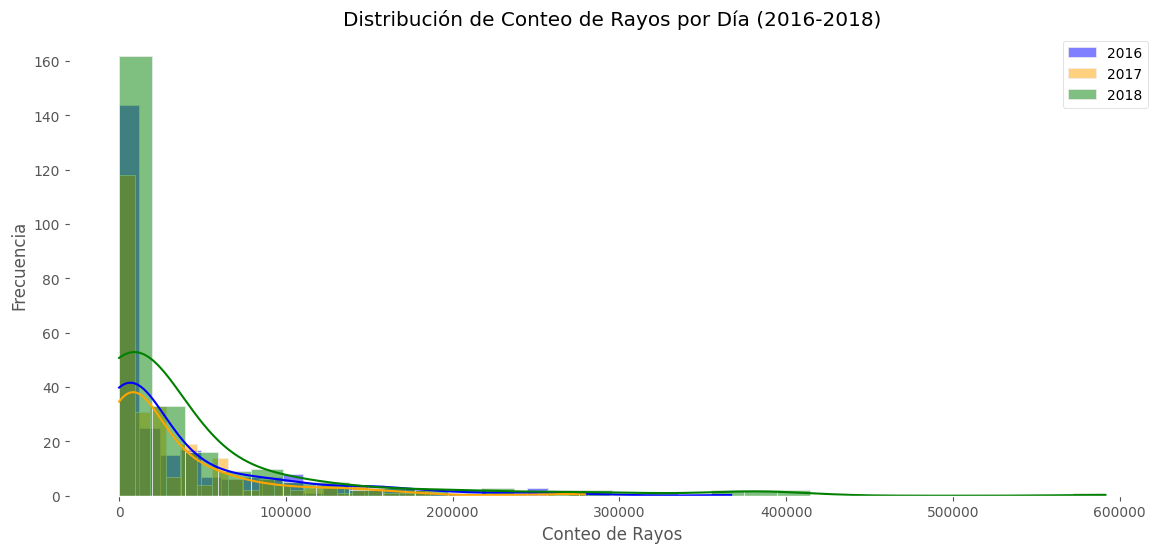

In [142]:
# Gráficos de series temporales
plt.figure(figsize=(14, 6))
plt.plot(df_2016['timestamp'], df_2016['count'], color='blue', label='2016')
plt.plot(df_2017['timestamp'], df_2017['count'], color='orange', label='2017')
plt.plot(df_2018['timestamp'], df_2018['count'], color='green', label='2018')
plt.xlabel('Fecha')
plt.ylabel('Conteo de Rayos')
plt.title('Conteo Diario de Rayos (2016-2018)')
plt.legend()
plt.show()

# Histogramas
plt.figure(figsize=(14, 6))
sns.histplot(df_2016['count'], bins=30, kde=True, color='blue', label='2016')
sns.histplot(df_2017['count'], bins=30, kde=True, color='orange', label='2017')
sns.histplot(df_2018['count'], bins=30, kde=True, color='green', label='2018')
plt.xlabel('Conteo de Rayos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Conteo de Rayos por Día (2016-2018)')
plt.legend()
plt.show()


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  798 non-null    object
 1   count      798 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.6+ KB


In [144]:
df["timestamp"].head(), df["timestamp"].tail()

(0    2016-01-01
 1    2016-01-02
 2    2016-01-03
 3    2016-01-04
 4    2016-01-05
 Name: timestamp, dtype: object,
 793    2018-12-27
 794    2018-12-28
 795    2018-12-29
 796    2018-12-30
 797    2018-12-31
 Name: timestamp, dtype: object)

In [145]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [146]:
serie_tiempo_df = df.copy()
serie_tiempo_df = serie_tiempo_df.groupby("timestamp")["count"].sum()
serie_tiempo_df = serie_tiempo_df.to_frame() # groupby nos otorga una lista, por ello, transformamos a df
serie_tiempo_df.describe()

,count
count,798.000000
mean,38958.793233
std,67277.839222
min,1.000000
25%,1221.750000
50%,10492.000000
75%,45027.750000
max,591549.000000


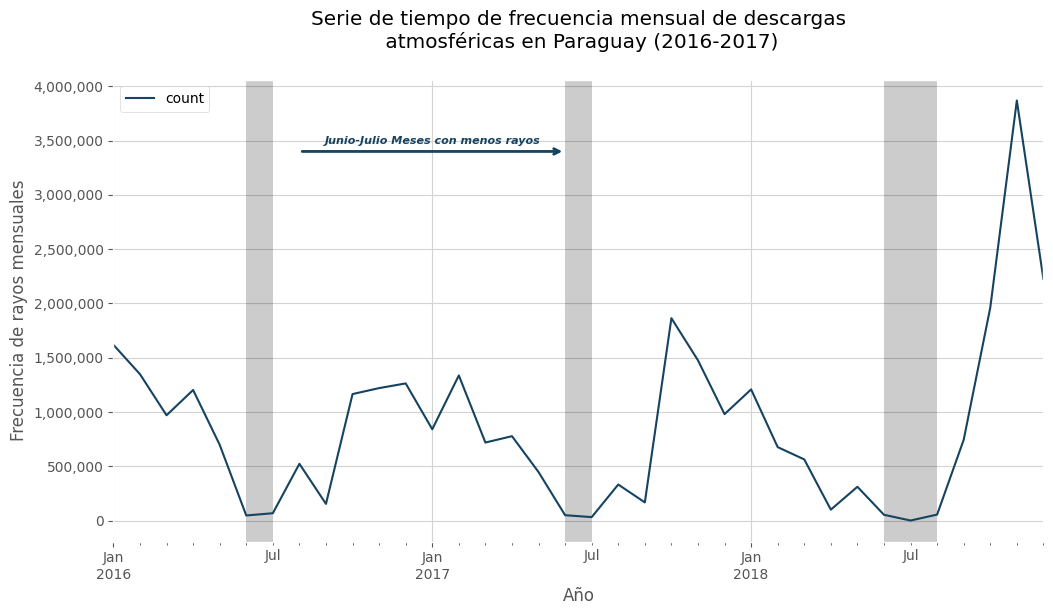

In [147]:
serie_tiempo_mes = serie_tiempo_df.resample(rule="M").sum()
fig, ax = plt.subplots(figsize=(12, 6))

serie_tiempo_mes.plot(kind="line", color = "#154360", ax=ax)

ax.set_title("Serie de tiempo de frecuencia mensual de descargas\n atmosféricas en Paraguay (2016-2017)", loc = "center", y=1.05)
ax.set_xlabel("Año")
ax.set_ylabel("Frecuencia de rayos mensuales")
ax.yaxis.set_major_formatter(mtick.FuncFormatter(thousand_separator))
ax.grid(color="lightgray")

# Área resaltada
ax.axvspan("2017-06-06", "2017-07-21", facecolor='black', alpha=0.2)
ax.axvspan("2016-06-01", "2016-07-21", facecolor='black', alpha=0.2)
ax.axvspan("2018-06-06", "2018-08-31", facecolor='black', alpha=0.2)

# Anotación
ax.annotate('Junio-Julio Meses con menos rayos',
             xy=("2017-01-06", 3500000),
             rotation=0,
             va='center',
             ha='center',
             color="#154360",
             fontweight='bold',
             fontstyle='italic',
             size=8
             )

# Flecha
ax.annotate('',
             xy=("2017-06-30", 3400000),
             xytext=("2016-08-30", 3400000),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color="#154360", lw=2))

plt.show()

In [148]:
pip install pmdarima

In [149]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# # Métrica de Evaluación
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics

In [150]:
def Prueba_Dickey_Fuller(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos no son estacionarios")

In [151]:
def evaluacion_metrica(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'\033[1mR2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n\033[0m')

In [152]:
time_series_df = df.copy()

time_series_monthly = pd.DataFrame(time_series_df.groupby("timestamp")["count"].sum())
time_series_monthly = time_series_monthly.resample(rule="M").sum()
time_series_monthly.describe()

,count
count,3.600000e+01
mean,8.635866e+05
std,8.013408e+05
min,1.254000e+03
25%,1.647658e+05
50%,7.318885e+05
75%,1.231443e+06
max,3.868974e+06


In [153]:
Prueba_Dickey_Fuller(time_series_monthly["count"],"count")

Resultados de la prueba de Dickey-Fuller para columna: count
Test Statistic                        -3.726045
p-value                                0.003761
No Lags Used                          10.000000
Número de observaciones utilizadas    25.000000
Critical Value (1%)                   -3.723863
Critical Value (5%)                   -2.986489
Critical Value (10%)                  -2.632800
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios


In [154]:
df1=time_series_monthly.copy()

# Creamos una columna con la primera diferencia
df1['count_diff'] = time_series_monthly['count'].diff()

# Removemos la primera observación pues al no tener referencia prevía para
# realizar la diferencia esta queda en NA
df1.dropna(inplace=True)

df1.head()

,count,count_diff
timestamp,,
2016-02-29,1349078,-270195.0
2016-03-31,970433,-378645.0
2016-04-30,1203283,232850.0
2016-05-31,698725,-504558.0
2016-06-30,47870,-650855.0


In [155]:
Prueba_Dickey_Fuller(df1["count_diff"],"count_diff")

Resultados de la prueba de Dickey-Fuller para columna: count_diff
Test Statistic                        -4.383031
p-value                                0.000318
No Lags Used                          10.000000
Número de observaciones utilizadas    24.000000
Critical Value (1%)                   -3.737709
Critical Value (5%)                   -2.992216
Critical Value (10%)                  -2.635747
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios


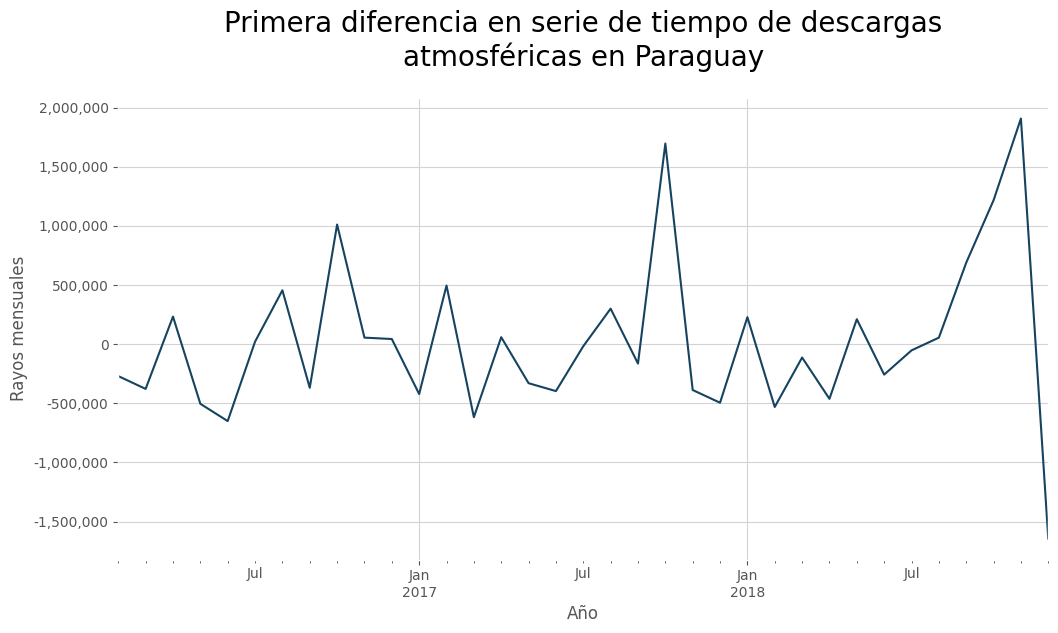

In [156]:
fig, ax = plt.subplots(figsize=(12, 6))

df1["count_diff"].plot(kind="line", color = "#154360", ax=ax)

ax.set_title("Primera diferencia en serie de tiempo de descargas\natmosféricas en Paraguay", loc = "center", y=1.05, fontsize= 20)
ax.set_xlabel("Año")
ax.set_ylabel("Rayos mensuales")
ax.yaxis.set_major_formatter(mtick.FuncFormatter(thousand_separator))
ax.grid(color="lightgray")

plt.show()

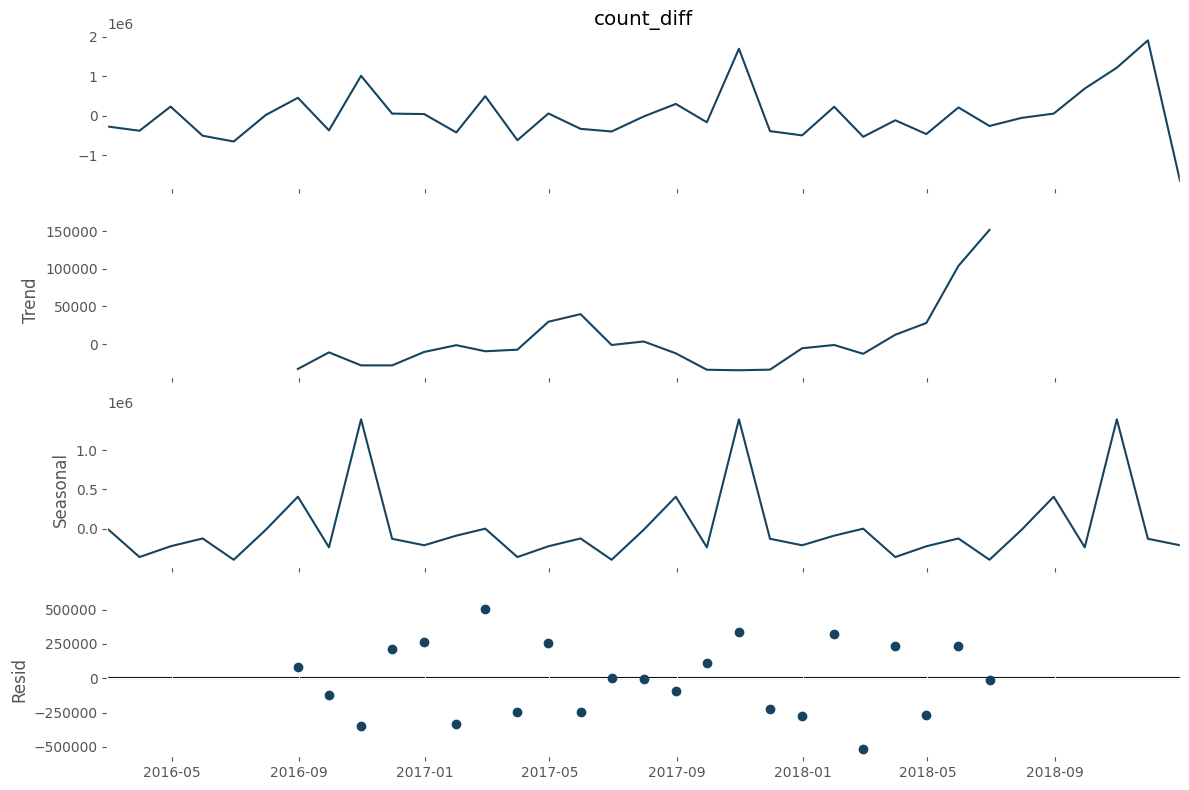

In [157]:
plt.rcParams["figure.figsize"] = (12, 8)
a = seasonal_decompose(df1["count_diff"], model = "add")

color = ["#154360"]
plt.rc('axes', prop_cycle=(plt.cycler('color', color)))

# Graficar
ax = a.plot()
plt.show()

In [158]:
train_data = time_series_monthly[:len(time_series_monthly)-12]
test_data = time_series_monthly[len(time_series_monthly)-12:]
test=test_data.copy()

In [159]:
train_data.shape, test_data.shape

((24, 1), (12, 1))

In [160]:
train_data

,count
timestamp,
2016-01-31,1619273
2016-02-29,1349078
2016-03-31,970433
2016-04-30,1203283
2016-05-31,698725
2016-06-30,47870
2016-07-31,68429
2016-08-31,523626
2016-09-30,154451


In [161]:
test_data

,count
timestamp,
2018-01-31,1208693
2018-02-28,677355
2018-03-31,563937
2018-04-30,101294
2018-05-31,311976
2018-06-30,54138
2018-07-31,1254
2018-08-31,55967
2018-09-30,744366


In [162]:
modelo_auto=auto_arima(train_data,start_p=0,d=1,start_q=0,
          max_p=4,max_d=2,max_q=4, start_P=0,
          D=1, start_Q=0, max_P=2,max_D=1,
          max_Q=2, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)
print(modelo_auto)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=321.612, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=317.681, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=317.266, Time=0.17 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=315.334, Time=0.11 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=317.245, Time=0.16 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=318.901, Time=0.44 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=317.157, Time=0.12 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=318.956, Time=0.13 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=315.758, Time=0.07 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=319.719, Time=0.44 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=317.487, Time=0.19 sec

Best model:  ARIMA(0,1,1)(0,1,0)[12]          
Total fit time: 2.040 seconds
 ARIMA(0,1,1)(0,1,0)[12]          


In [163]:
print(modelo_auto.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   24
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -155.667
Date:                             Thu, 06 Jun 2024   AIC                            315.334
Time:                                     18:07:43   BIC                            316.130
Sample:                                 01-31-2016   HQIC                           314.832
                                      - 12-31-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3672      0.570     -0.644      0.520      -1.485       0.751
sigma2      1.547e+11   8.8

In [164]:
arima_model = SARIMAX(train_data["count"], order = (1,1,0), seasonal_order = (0,1,1,12))
arima_result = arima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


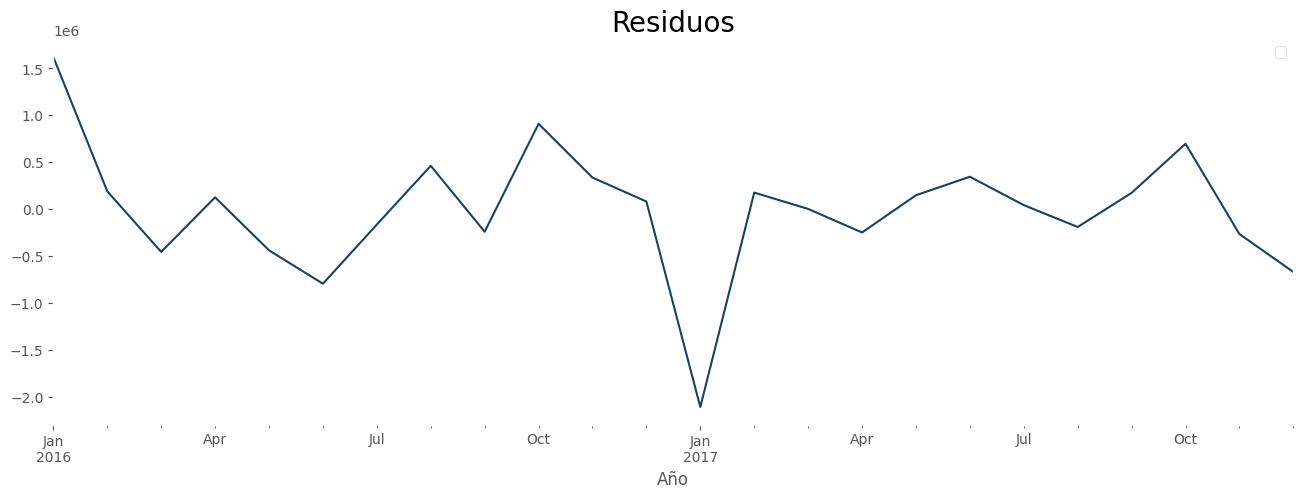

In [165]:
# Graficación de los residuos

residuals = pd.DataFrame(arima_result.resid)
residuals.plot(figsize = (16,5))
plt.title("Residuos", fontsize= 20)
plt.legend("")
plt.xlabel("Año")
plt.show()

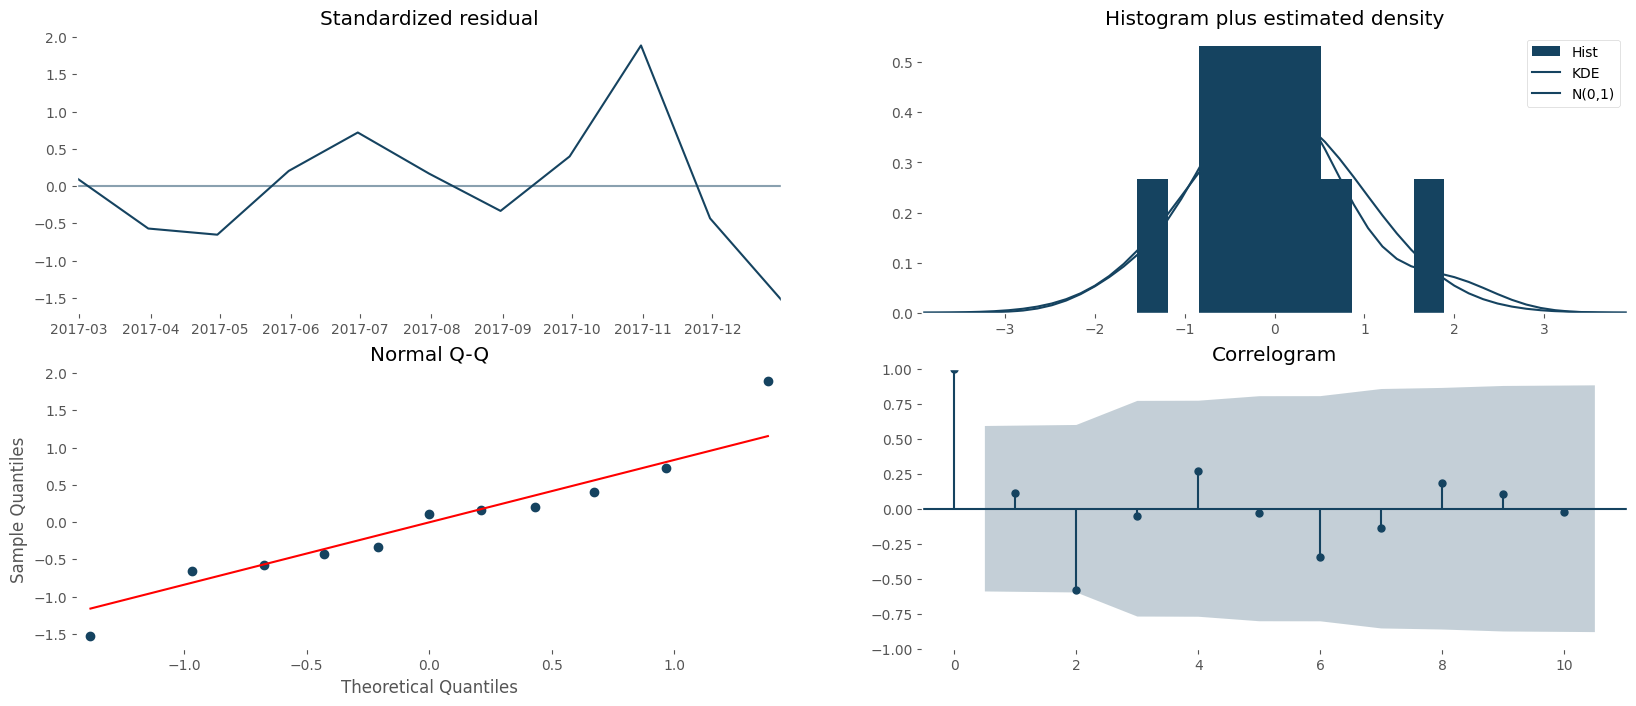

In [166]:
modelo_auto.plot_diagnostics(figsize=(20,8))
plt.show()

In [167]:
arima_pred = arima_result.predict(start = len(train_data), end = len(time_series_monthly)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


2018-01-31    6.012245e+05
2018-02-28    1.093859e+06
2018-03-31    4.768953e+05
2018-04-30    5.221107e+05
2018-05-31    2.033029e+05
2018-06-30   -1.791733e+05
2018-07-31   -1.988346e+05
2018-08-31    9.177913e+04
2018-09-30   -6.090299e+04
2018-10-31    1.668452e+06
2018-11-30    1.257050e+06
2018-12-31    7.330393e+05
Freq: M, Name: ARIMA Predictions, dtype: float64

In [168]:
arima_pred2 = arima_result.predict(start='2016-03-31',end='2018-12-31', typ="levels").rename("ARIMA Predictions")
arima_pred2

2016-03-31    1.425840e+06
2016-04-30    1.078003e+06
2016-05-31    1.137135e+06
2016-06-30    8.420554e+05
2016-07-31    2.328147e+05
2016-08-31    6.244354e+04
2016-09-30    3.948154e+05
2016-10-31    2.575432e+05
2016-11-30    8.847103e+05
2016-12-31    1.182880e+06
2017-01-31    2.948871e+06
2017-02-28    1.161506e+06
2017-03-31    7.172649e+05
2017-04-30    1.026789e+06
2017-05-31    2.999487e+05
2017-06-30   -2.943519e+05
2017-07-31   -9.786016e+03
2017-08-31    5.228477e+05
2017-09-30   -5.025737e+03
2017-10-31    1.168885e+06
2017-11-30    1.742306e+06
2017-12-31    1.649726e+06
2018-01-31    6.012245e+05
2018-02-28    1.093859e+06
2018-03-31    4.768953e+05
2018-04-30    5.221107e+05
2018-05-31    2.033029e+05
2018-06-30   -1.791733e+05
2018-07-31   -1.988346e+05
2018-08-31    9.177913e+04
2018-09-30   -6.090299e+04
2018-10-31    1.668452e+06
2018-11-30    1.257050e+06
2018-12-31    7.330393e+05
Freq: M, Name: ARIMA Predictions, dtype: float64

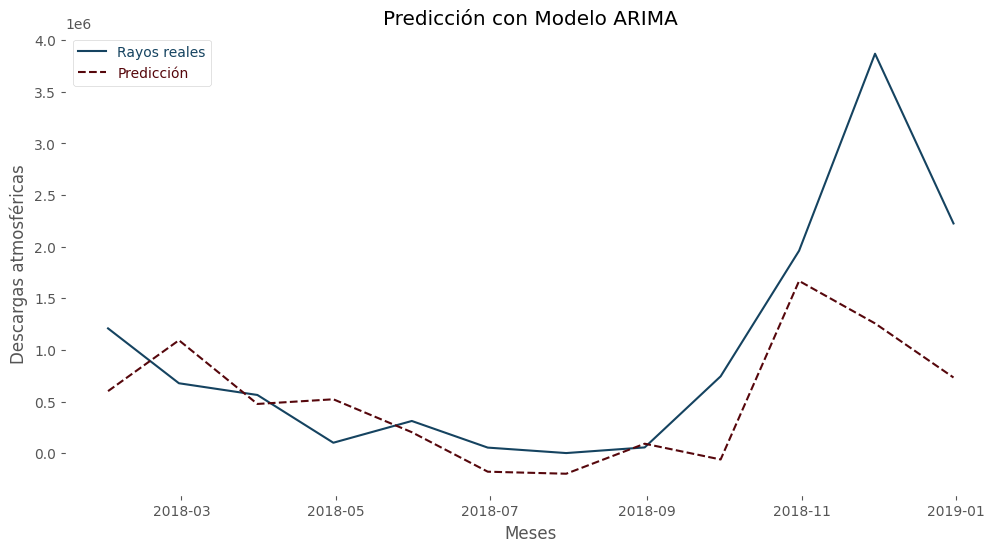

In [169]:
fig = plt.subplots(figsize=(12, 6))
plt.plot(test_data["count"], label="Rayos reales", color = "#154360")
plt.plot(arima_pred, color="#56070c", label="Predicción", linestyle = 'dashed')
plt.title("Predicción con Modelo ARIMA")
plt.xlabel('Meses')
plt.ylabel('Descargas atmosféricas')
plt.legend(labelcolor='linecolor', fontsize=10)
plt.show()

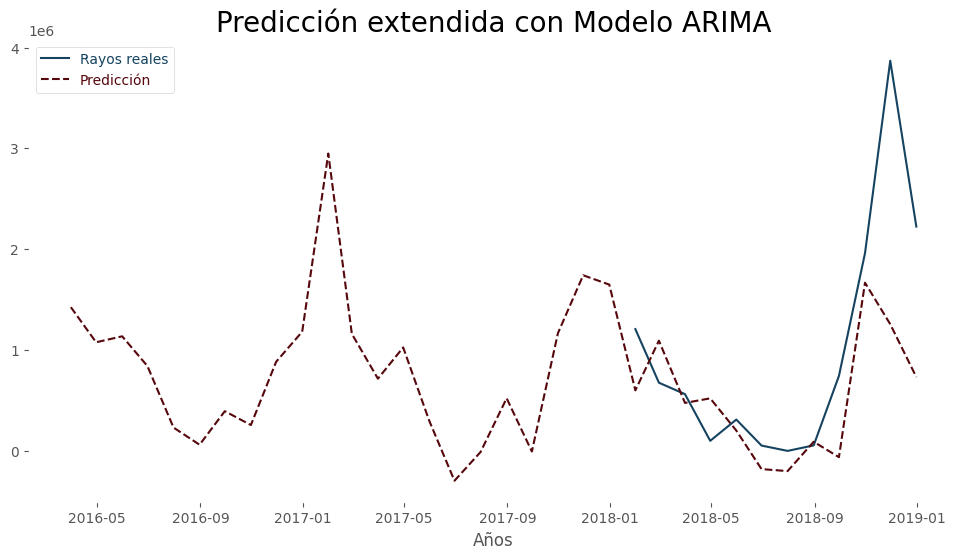

In [170]:
fig = plt.subplots(figsize=(12, 6))

plt.plot(test_data["count"],label="Rayos reales", color = "#154360")
plt.plot(arima_pred2, color="#56070c", label="Predicción", linestyle = "dashed")
plt.title("Predicción extendida con Modelo ARIMA", fontsize= 20)
plt.xlabel("Años")
plt.ylabel("")
plt.legend(labelcolor='linecolor', fontsize=10)
plt.show()

In [171]:
evaluacion_metrica(test_data,arima_pred)

Evaluation metric results:-
MSE is : 884776663166.5905
MAE is : 609312.1471255263
RMSE is : 940625.6764338248
MAPE is : 4192.467550173174
R2 is : 0.2977568818412981



In [172]:
train_data = time_series_monthly[:'2017-12-31']
test_data = time_series_monthly['2018-01-01':'2018-12-31']
test=test_data.copy()

In [173]:
train_data.shape, test_data.shape

((24, 1), (12, 1))

In [174]:
arima_model = SARIMAX(train_data["count"], order = (0,1,1), seasonal_order = (0,1,0,12))
arima_result = arima_model.fit()

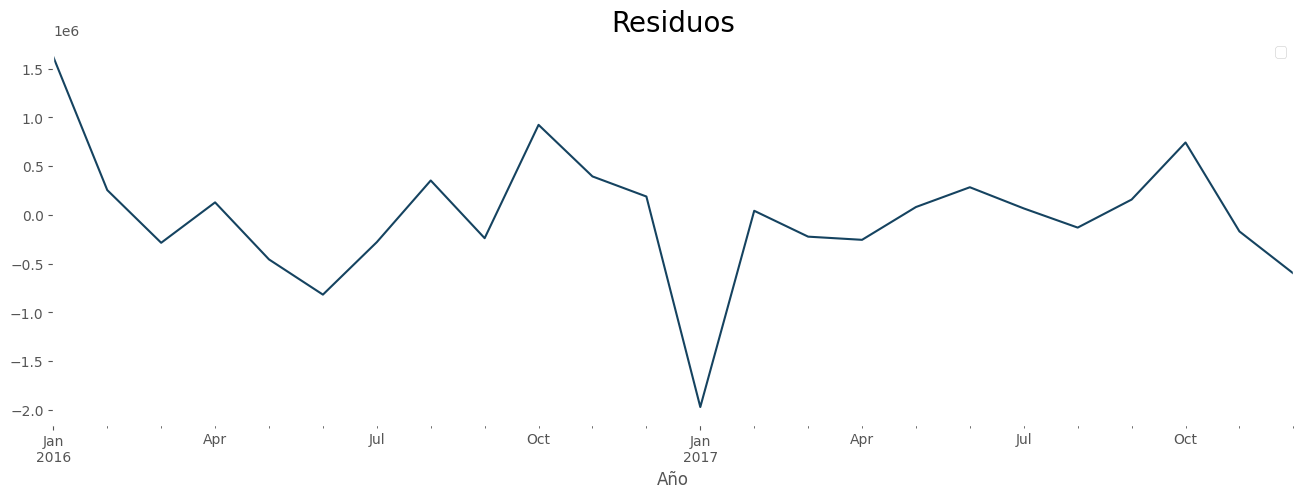

In [175]:
residuals = pd.DataFrame(arima_result.resid)
residuals.plot(figsize = (16,5))
plt.title("Residuos", fontsize= 20)
plt.legend("")
plt.xlabel("Año")
plt.show()

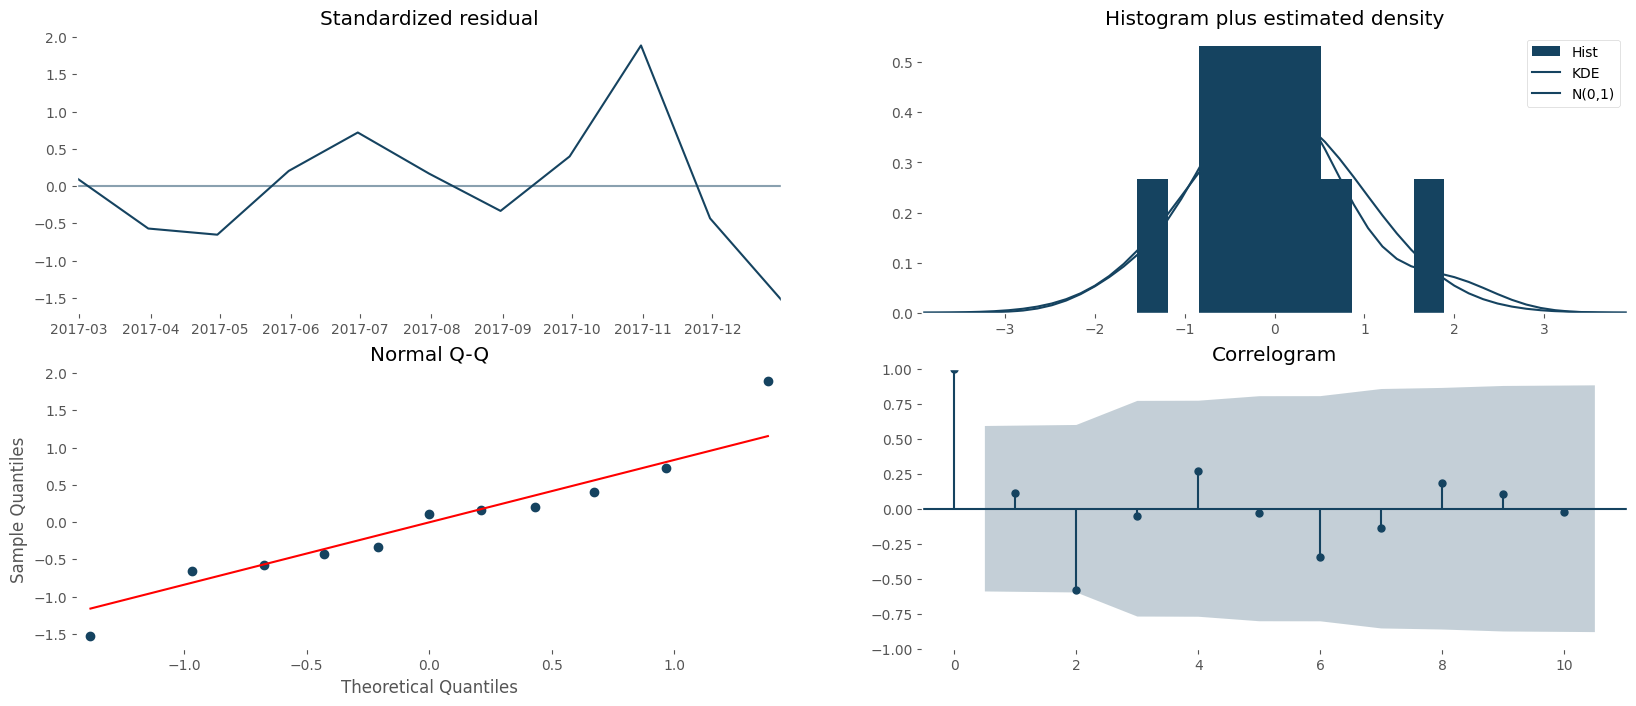

In [176]:
modelo_auto.plot_diagnostics(figsize=(20,8))
plt.show()

In [177]:
arima_pred = arima_result.predict(start = "2018-01-31", end = '2018-12-31', typ="levels").rename("ARIMA Predictions")
arima_pred

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


2018-01-31    7.796444e+05
2018-02-28    1.275081e+06
2018-03-31    6.572084e+05
2018-04-30    7.157554e+05
2018-05-31    3.854024e+05
2018-06-30   -1.190163e+04
2018-07-31   -2.957863e+04
2018-08-31    2.704634e+05
2018-09-30    1.060014e+05
2018-10-31    1.802163e+06
2018-11-30    1.414163e+06
2018-12-31    9.186464e+05
Freq: M, Name: ARIMA Predictions, dtype: float64

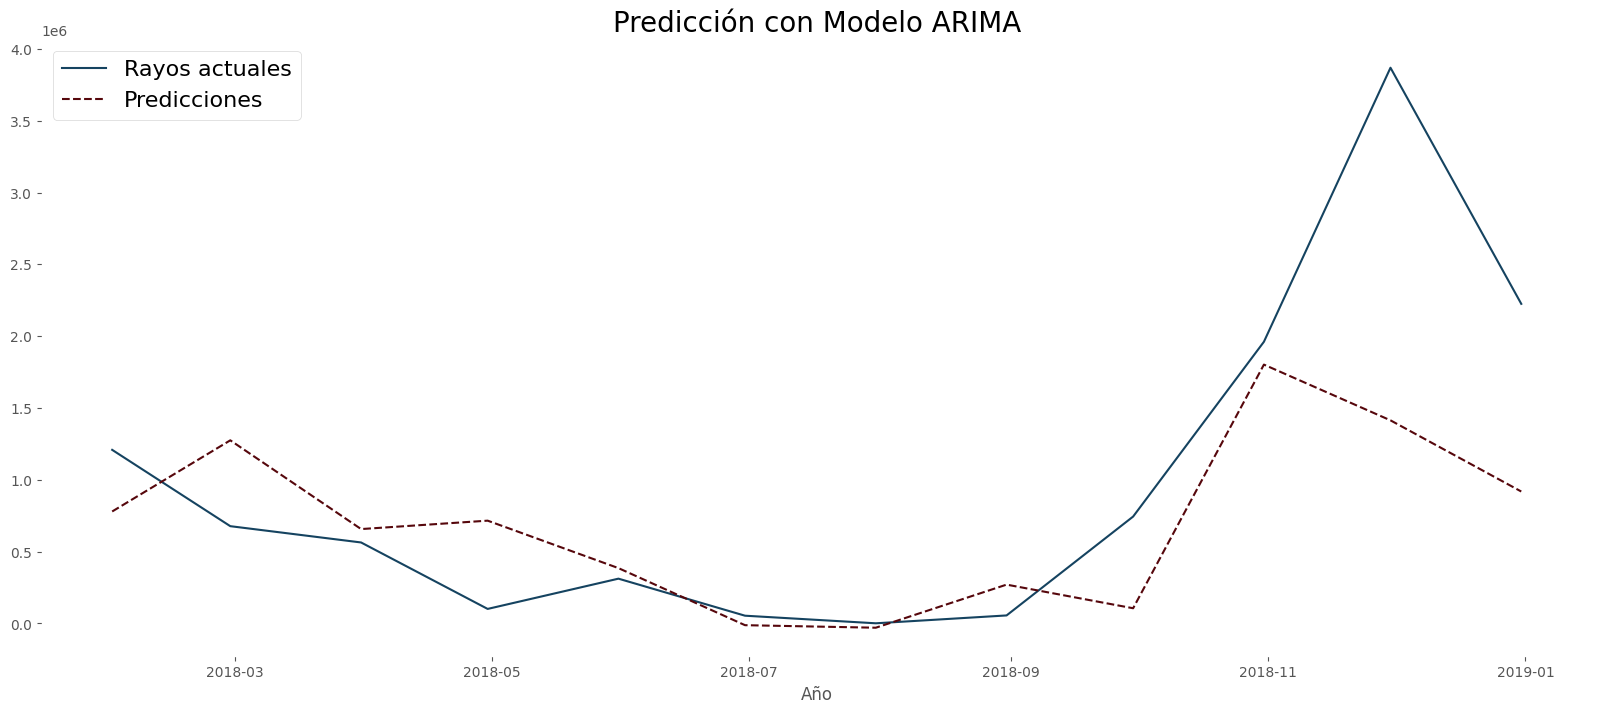

In [178]:
plt.rcParams["figure.figsize"] = (20, 8)

plt.plot(test_data["count"],label="Rayos actuales", color = "#154360")
plt.plot(arima_pred, color="#56070c", label="Predicciones", linestyle = "dashed")
plt.title("Predicción con Modelo ARIMA", fontsize = 20)
plt.xlabel("Año")
plt.ylabel("")
plt.legend(fontsize=16)
plt.show()

In [179]:
arima_pred = arima_result.predict(start = len(train_data), end = len(time_series_monthly)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

2018-01-31    7.796444e+05
2018-02-28    1.275081e+06
2018-03-31    6.572084e+05
2018-04-30    7.157554e+05
2018-05-31    3.854024e+05
2018-06-30   -1.190163e+04
2018-07-31   -2.957863e+04
2018-08-31    2.704634e+05
2018-09-30    1.060014e+05
2018-10-31    1.802163e+06
2018-11-30    1.414163e+06
2018-12-31    9.186464e+05
Freq: M, Name: ARIMA Predictions, dtype: float64

In [180]:
arima_pred2 = arima_result.predict(start='2016-03-31',end='2018-12-31', typ="levels").rename("ARIMA Predictions")
arima_pred2

2016-03-31    1.257363e+06
2016-04-30    1.075573e+06
2016-05-31    1.156400e+06
2016-06-30    8.667817e+05
2016-07-31    3.485816e+05
2016-08-31    1.713040e+05
2016-09-30    3.942496e+05
2016-10-31    2.425076e+05
2016-11-30    8.266944e+05
2016-12-31    1.075981e+06
2017-01-31    2.814121e+06
2017-02-28    1.295892e+06
2017-03-31    9.434394e+05
2017-04-30    1.034527e+06
2017-05-31    3.676157e+05
2017-06-30   -2.326232e+05
2017-07-31   -3.303357e+04
2017-08-31    4.637107e+05
2017-09-30    1.161237e+04
2017-10-31    1.121951e+06
2017-11-30    1.646683e+06
2017-12-31    1.582108e+06
2018-01-31    7.796444e+05
2018-02-28    1.275081e+06
2018-03-31    6.572084e+05
2018-04-30    7.157554e+05
2018-05-31    3.854024e+05
2018-06-30   -1.190163e+04
2018-07-31   -2.957863e+04
2018-08-31    2.704634e+05
2018-09-30    1.060014e+05
2018-10-31    1.802163e+06
2018-11-30    1.414163e+06
2018-12-31    9.186464e+05
Freq: M, Name: ARIMA Predictions, dtype: float64

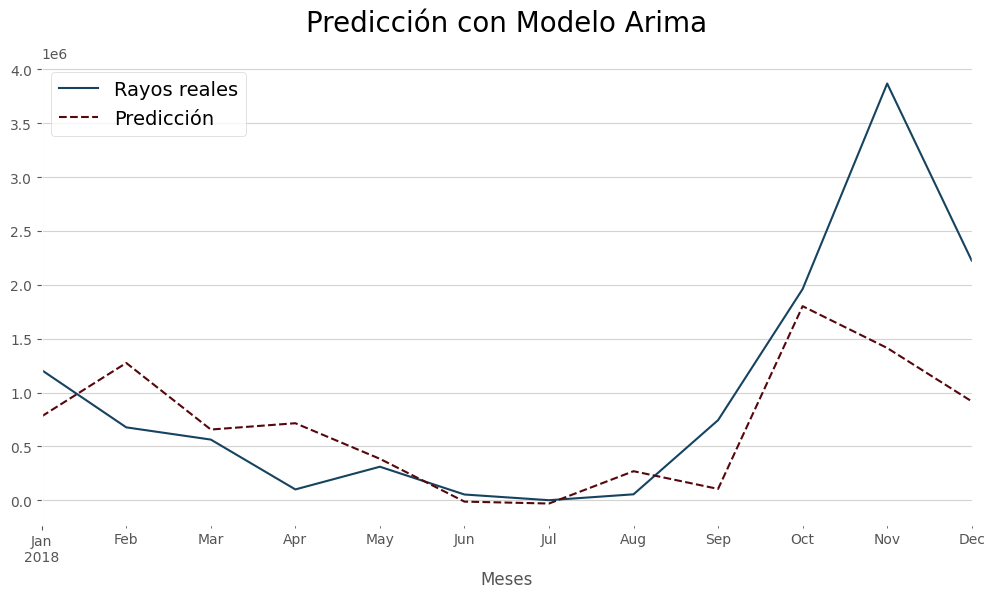

In [181]:
fig, ax = plt.subplots(figsize=(12, 6))

test_data["count"].plot(kind="line", color = "#154360", ax=ax)
arima_pred.plot(kind="line", color="#56070c", label="Predicciones", linestyle = "dashed", ax=ax)
ax.set_title("Predicción con Modelo Arima", loc = "center", y=1.05, fontsize=20)
ax.set_xlabel("Meses")
ax.legend(["Rayos reales", "Predicción"], fontsize=14)
ax.grid(color="lightgray")

plt.show()

<ipython-input-182-e18cc2c1b8da>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


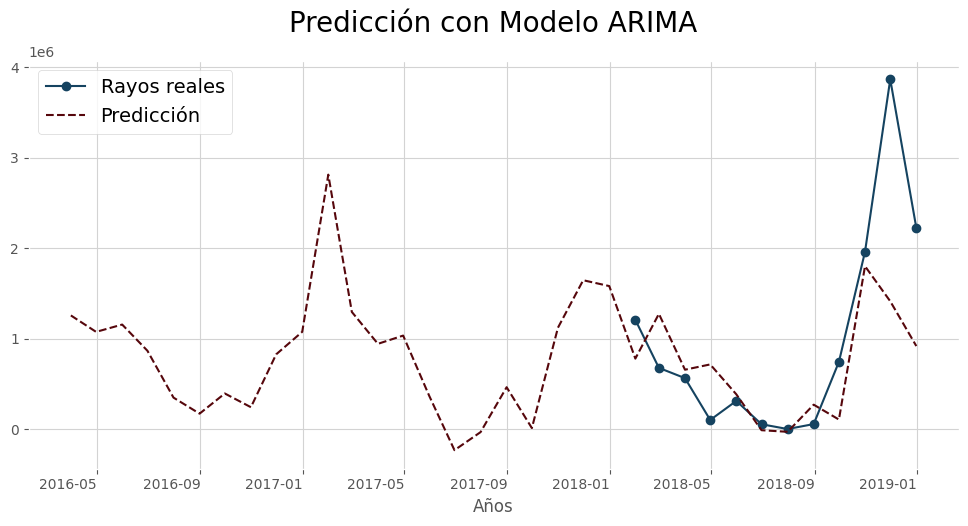

In [182]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot_date(test_data.index, test_data["count"], label="Original", color = "#154360", linestyle = "solid")
arima_pred2.plot(kind="line", color="#56070c", label="Predicciones", linestyle = "dashed")
ax.set_title("Predicción con Modelo ARIMA", loc = "center", y=1.05, fontsize=20)
ax.set_xlabel("Años")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(["Rayos reales", "Predicción"], fontsize=14)
ax.grid(color="lightgray")
plt.show()

In [183]:
evaluacion_metrica(test_data,arima_pred)

Evaluation metric results:-
MSE is : 762507773287.3217
MAE is : 556499.6884758474
RMSE is : 873216.9107886777
MAPE is : 4933.857630044318
R2 is : 0.3948011304715924

